<a href="https://colab.research.google.com/github/AksenovEA/Test/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучение модели...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.3442 - loss: 2.0695 - val_accuracy: 0.4706 - val_loss: 1.5916
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6100 - loss: 1.1013 - val_accuracy: 0.6368 - val_loss: 1.0515
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6889 - loss: 0.8896 - val_accuracy: 0.7226 - val_loss: 0.7959
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7204 - loss: 0.7959 - val_accuracy: 0.7513 - val_loss: 0.7216
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7521 - loss: 0.7147 - val_accuracy: 0.7568 - val_loss: 0.7250


Модель сохранена как 'cifar10_cnn_model.h5'
Введите номер изображения (0-9999) или -1 для выхода: 456


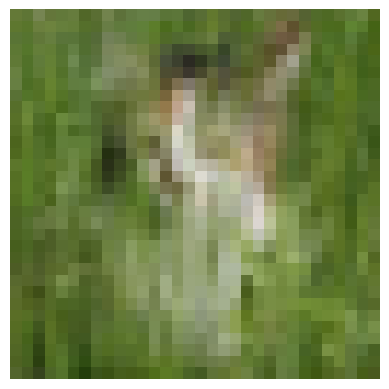

Распознанный класс: deer
Реальный класс: cat
Error
Введите номер изображения (0-9999) или -1 для выхода: 300


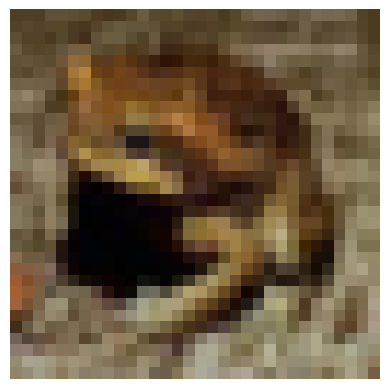

Распознанный класс: frog
Реальный класс: frog
Correct
Введите номер изображения (0-9999) или -1 для выхода: 800


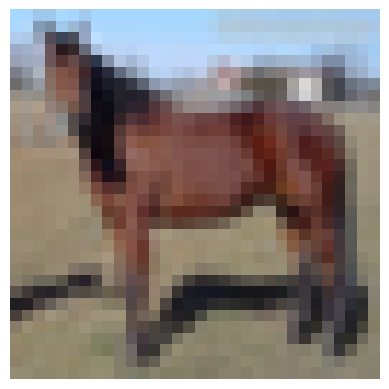

Распознанный класс: horse
Реальный класс: horse
Correct
Введите номер изображения (0-9999) или -1 для выхода: 1488


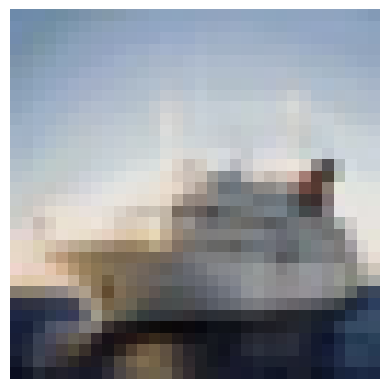

Распознанный класс: ship
Реальный класс: ship
Correct
Введите номер изображения (0-9999) или -1 для выхода: -1


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

model = create_cnn_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Обучение модели...")
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

model.save('cifar10_cnn_model.h5')
print("Модель сохранена как 'cifar10_cnn_model.h5'")

while True:
    try:
        image_num = int(input(f"Введите номер изображения (0-9999) или -1 для выхода: "))

        if image_num == -1:
            break

        if 0 <= image_num < 10000:
            image = x_test[image_num]
            true_label = y_test[image_num][0]

            image_for_prediction = np.expand_dims(image, axis=0)
            predictions = model.predict(image_for_prediction, verbose=0)
            predicted_label = np.argmax(predictions[0])

            plt.imshow(image)
            plt.axis('off')
            plt.show()

            print(f"Распознанный класс: {class_names[predicted_label]}")
            print(f"Реальный класс: {class_names[true_label]}")

            if predicted_label == true_label:
                print("Correct")
            else:
                print("Error")
        else:
            print("Ошибка: номер должен быть от 0 до 9999")

    except ValueError:
        print("Ошибка: введите целое число")